In [1]:
import numpy as np
import matplotlib.pyplot as plt

from branchcut.exampleCreator import createExample, createUnwrappedBaseline, TrueBranchCuts
from branchcut.unwrap import *
from branchcut.setup import find_residues, create_mask
from branchcut.branchCut import branch_cut

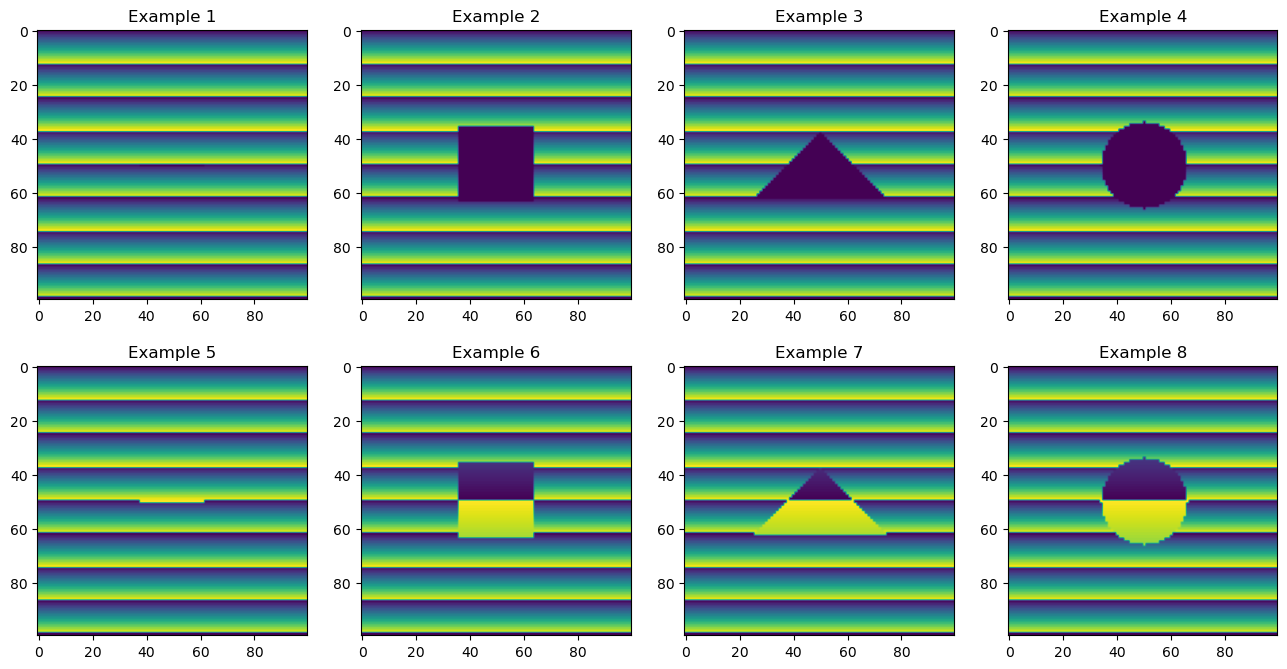

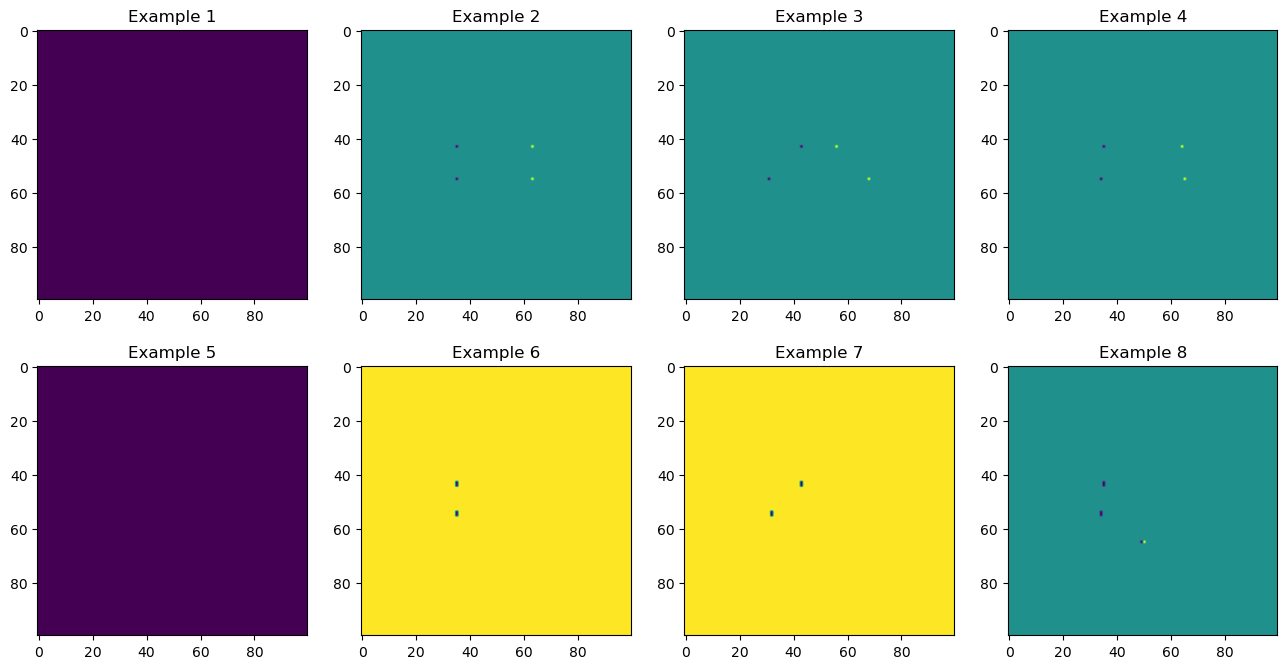

In [46]:
save = False
SIZE = (100,100)
minmax = [(0,1*2*np.pi),
          (0,2*2*np.pi),
          (0,4*2*np.pi),
          (0,8*2*np.pi),
]

phase_baseline = createUnwrappedBaseline(SIZE, minmax[3], format='vertical')
phase_baseline_2 = createUnwrappedBaseline(SIZE, minmax[0], format='vertical')

scale = [np.ones(SIZE)*8*np.pi, 9*np.pi - phase_baseline_2]

mask = [create_mask(SIZE,loc=[50,25], shape='line', percent=False),
        create_mask(SIZE,loc=[50,50], shape='square', percent=False),
        create_mask(SIZE,loc=[50,50], shape='triangle', percent=False),
        create_mask(SIZE,loc=[50,50], shape='circle', percent=False),
]

shape = ['line',
         'square',
         'triangle',
         'circle',
]

phase = []
residue = []
for idx, vscale in zip([1,2], scale):
    for vshape, vmask in zip(shape, mask):
        add = vmask * (vscale - phase_baseline)
        phase.append(createExample(phase_baseline, add_image=add, add_first=True))
        residue.append(find_residues(phase[-1][1]))
        if save:
            np.save( f"data/example_data/wrapped_phase_{vshape}_example_{idx}",phase[-1][1])
            np.save( f"data/example_data/unwrapped_phase_{vshape}_example_{idx}",phase[-1][1])


fig, ax = plt.subplots(2,4, figsize=(16,8))
for i in range(8):
    pax = ax.flatten()[i]
    pax.set_title(f'Example {i+1}')
    pax.imshow(phase[i][1])

fig, ax = plt.subplots(2,4, figsize=(16,8))
for i in range(8):
    pax = ax.flatten()[i]
    pax.set_title(f'Example {i+1}')
    pax.imshow(residue[i])


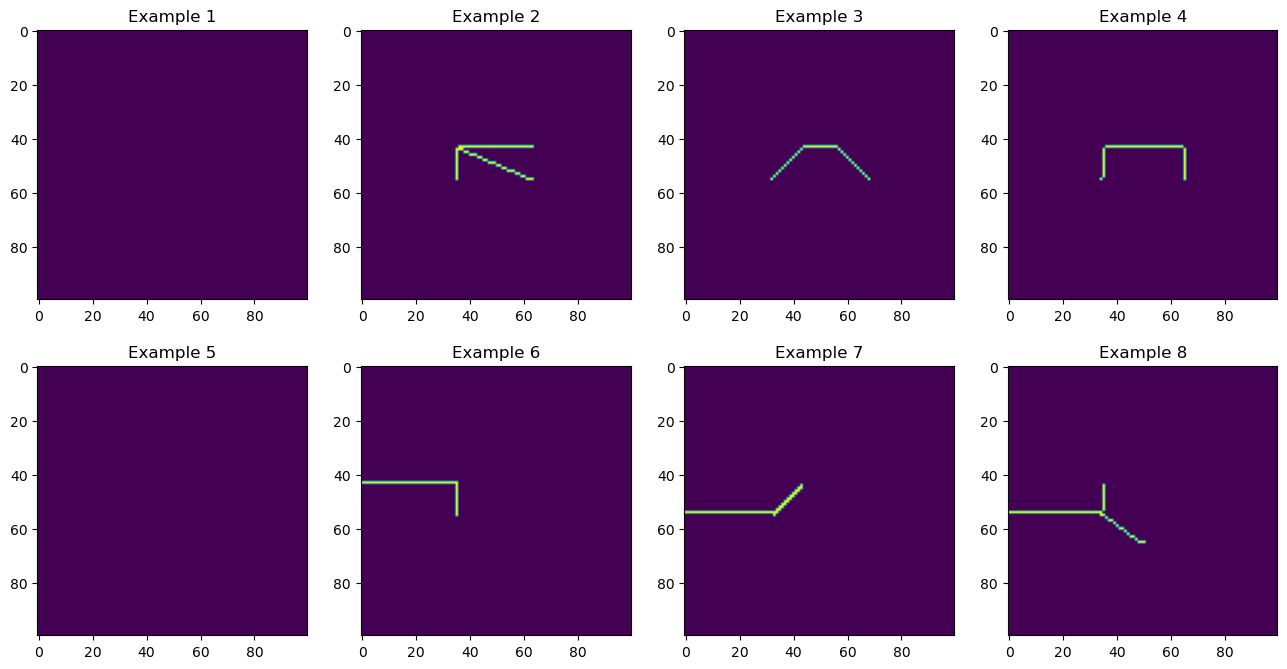

In [47]:
l_branchcut = []
for vres in residue:
    l_branchcut.append(branch_cut(vres))

fig, ax = plt.subplots(2,4, figsize=(16,8))
for i in range(8):
    pax = ax.flatten()[i]
    pax.set_title(f'Example {i+1}')
    pax.imshow(l_branchcut[i])

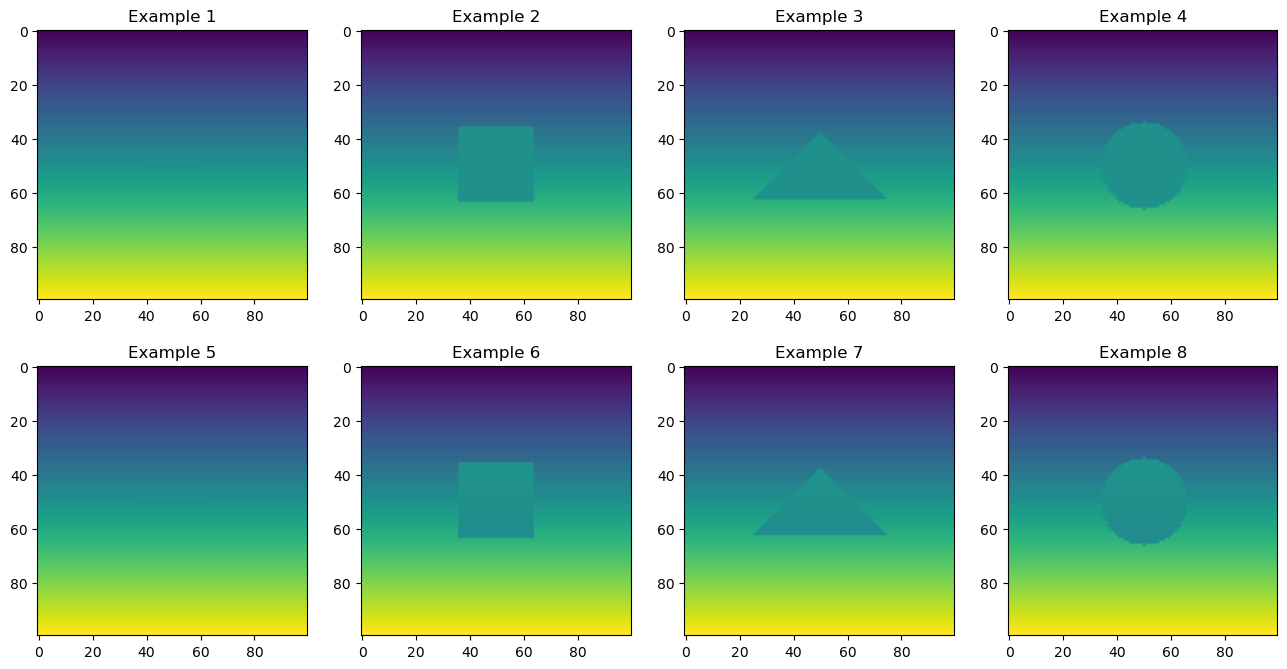

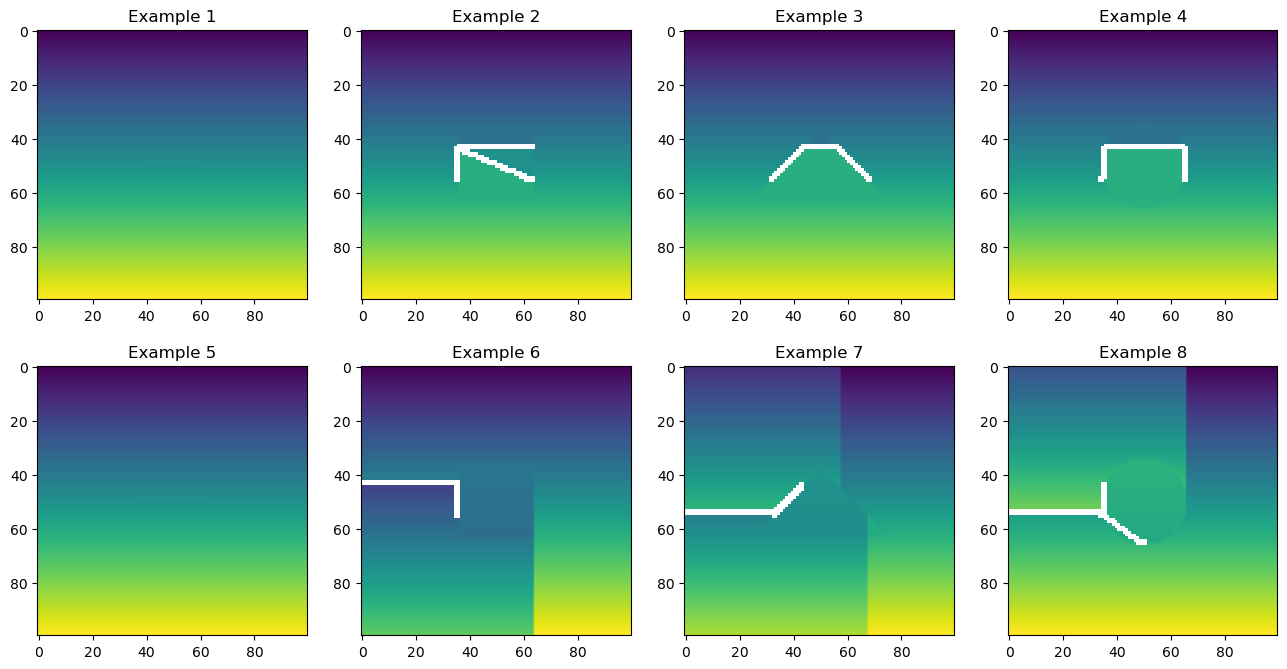

In [48]:
unwrapped_from_branchcut = []
for vphase, vbranchcut in zip(phase, l_branchcut):
    unwrapped_from_branchcut.append(unwrap(phase=vphase[1],
                                    seed=(0,0),
                                    branchCuts=vbranchcut,
                                    mode="dfs",
                                    unwrapBranchPixels=False,
                                    ))

fig, ax = plt.subplots(2,4, figsize=(16,8))
for i in range(8):
    pax = ax.flatten()[i]
    pax.set_title(f'Example {i+1}')
    pax.imshow(phase[i][0])

fig, ax = plt.subplots(2,4, figsize=(16,8))
for i in range(8):
    pax = ax.flatten()[i]
    pax.set_title(f'Example {i+1}')
    pax.imshow(unwrapped_from_branchcut[i])